In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys

from simu_eulerc import simulate_eulerc

sys.path.append('../code')

In [43]:
#k_eddy, mu, attenu, k0, gamma
params = [0.0001, 0.001, 6, .8, 3]

In [4]:
sim6 = simulate_eulerc(params)
%store sim6

+++ Variable time-step interpolation +++
Interpolated dataset has 20153 time steps with average length 10.0 s.
Constant dt interpolation would require dt = 10.526 s --> 18189 steps.
Computation time will be reduced by -10.798 %
++++++++++++++++++++++++++++++++++++++++
Done, took  0.5939185619354248
Stored 'sim6' (list)


In [8]:
%store -r sim5

-3.0452936687931453


[Text(0.5, 1.0, 'SST-ftemp')]

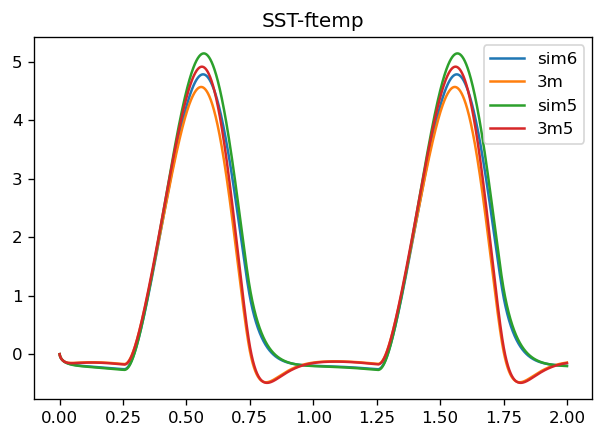

In [9]:
fig, ax = plt.subplots(dpi=120)
ax.plot(sim6[2]/86400,sim6[0][:,0]-sim6[0][:,-1],label='sim6',)
ax.plot(sim6[2]/86400,sim6[0][:,0]-sim6[0][:,20],label='3m')
ax.plot(sim5[2]/86400,sim5[0][:,0]-sim5[0][:,-1],label='sim5',)
ax.plot(sim5[2]/86400,sim5[0][:,0]-sim5[0][:,20],label='3m5')
print(sim6[1][20])

ax.legend()
ax.set(title='SST-ftemp')

-3.0452936687931453


[Text(0.5, 1.0, 'SST-ftemp')]

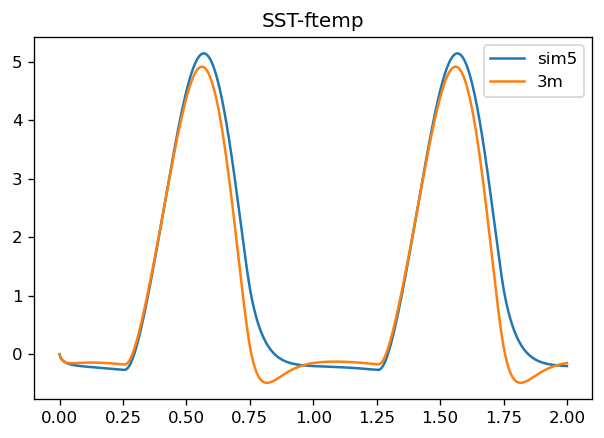

In [52]:
fig, ax = plt.subplots(dpi=120)
ax.plot(sim5[2]/86400,sim5[0][:,0]-sim5[0][:,-1],label='sim5',)
ax.plot(sim5[2]/86400,sim5[0][:,0]-sim5[0][:,20],label='3m')
print(sim5[1][20])

ax.legend()
ax.set(title='SST-ftemp')

## Sensitivity tests

In [45]:
pkappa = [1e-5,0.5e-4,1e-4,2e-4,5e-4]
pmu = [0,0.001,0.005,0.01]
pattenu = [1,2,3,4,5,6]
pk0 = [0,0.2,0.4,0.6,0.8,1]
pgamma = [1,2,5,10,20]

In [46]:
simkappa = []
parkappa = params.copy()
for i in range(len(pkappa)):
    parkappa[0] = pkappa[i]
    simkappa.append(simulate_eulerc(parkappa))

+++ Variable time-step interpolation +++
Interpolated dataset has 20153 time steps with average length 10.0 s.
Constant dt interpolation would require dt = 10.526 s --> 18189 steps.
Computation time will be reduced by -10.798 %
++++++++++++++++++++++++++++++++++++++++
Done, took  0.6766242980957031
+++ Variable time-step interpolation +++
Interpolated dataset has 20153 time steps with average length 10.0 s.
Constant dt interpolation would require dt = 10.526 s --> 18189 steps.
Computation time will be reduced by -10.798 %
++++++++++++++++++++++++++++++++++++++++
Done, took  0.7095828056335449
+++ Variable time-step interpolation +++
Interpolated dataset has 20153 time steps with average length 10.0 s.
Constant dt interpolation would require dt = 10.526 s --> 18189 steps.
Computation time will be reduced by -10.798 %
++++++++++++++++++++++++++++++++++++++++
Done, took  0.6210131645202637
+++ Variable time-step interpolation +++
Interpolated dataset has 20153 time steps with average leng

NameError: name 'sim5' is not defined

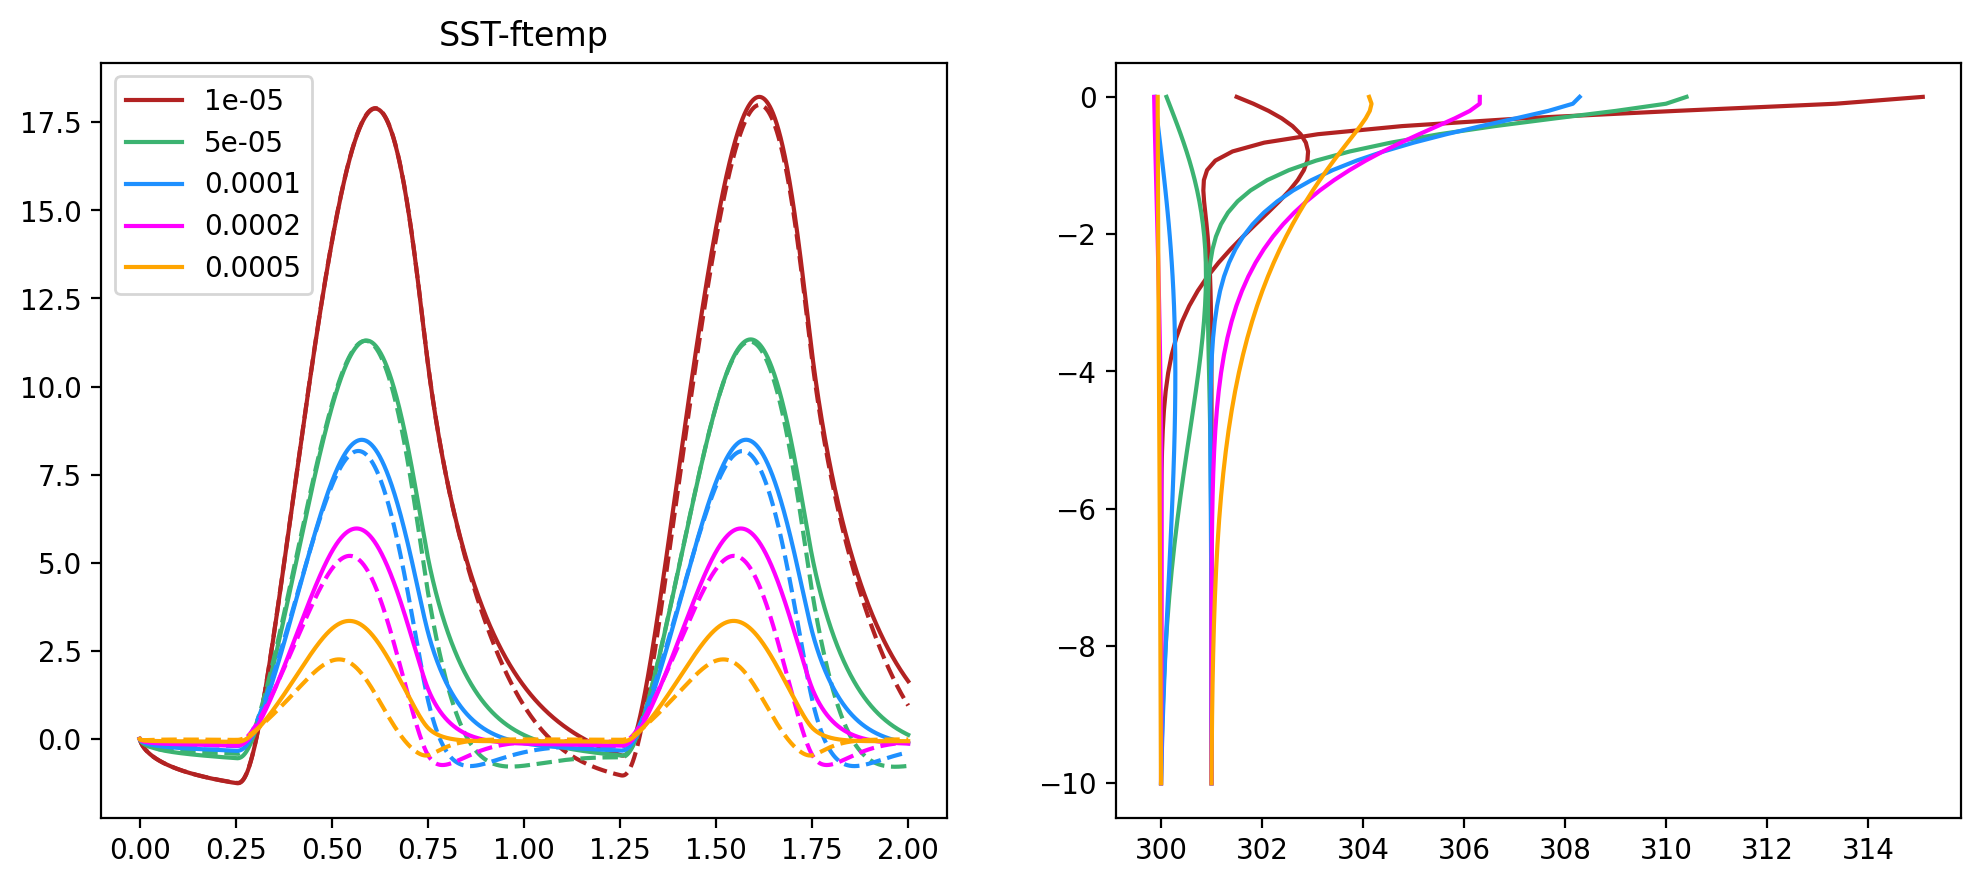

In [47]:
cols = ['firebrick','mediumseagreen','dodgerblue','magenta','orange','navy']
fig, ax = plt.subplots(1,2,dpi=200,figsize=(12,5))
for i in range(len(pkappa)):
    ax[0].plot(simkappa[i][2]/86400,simkappa[i][0][:,0]-simkappa[i][0][:,-1],label=pkappa[i],c=cols[i])
    ax[0].plot(simkappa[i][2]/86400,simkappa[i][0][:,0]-simkappa[i][0][:,20],'--',c=cols[i])
ax[0].legend()
ax[0].set(title='SST-ftemp')


for i in range(len(pkappa)):
    noon = np.where(simkappa[i][2]/86400 > 0.5)[0][0]
    night = np.where(simkappa[i][2]/86400 > 1.)[0][0]
    ax[1].plot(simkappa[i][0][noon,:]+1,simkappa[i][1],c=cols[i])
    ax[1].plot(simkappa[i][0][night,:],simkappa[i][1],c=cols[i])

print(sim5[1][20])
plt.show()

In [19]:
simmu = []
parmu = params.copy()
for i in range(len(pmu)):
    parmu[1] = pmu[i]
    simmu.append(simulate_eulerc(parmu))

+++ Variable time-step interpolation +++
Interpolated dataset has 20153 time steps with average length 10.0 s.
Constant dt interpolation would require dt = 10.526 s --> 18189 steps.
Computation time will be reduced by -10.798 %
++++++++++++++++++++++++++++++++++++++++
Done, took  0.5798792839050293
+++ Variable time-step interpolation +++
Interpolated dataset has 20153 time steps with average length 10.0 s.
Constant dt interpolation would require dt = 10.526 s --> 18189 steps.
Computation time will be reduced by -10.798 %
++++++++++++++++++++++++++++++++++++++++
Done, took  0.8507077693939209
+++ Variable time-step interpolation +++
Interpolated dataset has 20153 time steps with average length 10.0 s.
Constant dt interpolation would require dt = 10.526 s --> 18189 steps.
Computation time will be reduced by -10.798 %
++++++++++++++++++++++++++++++++++++++++
Done, took  0.7760477066040039
+++ Variable time-step interpolation +++
Interpolated dataset has 20153 time steps with average leng

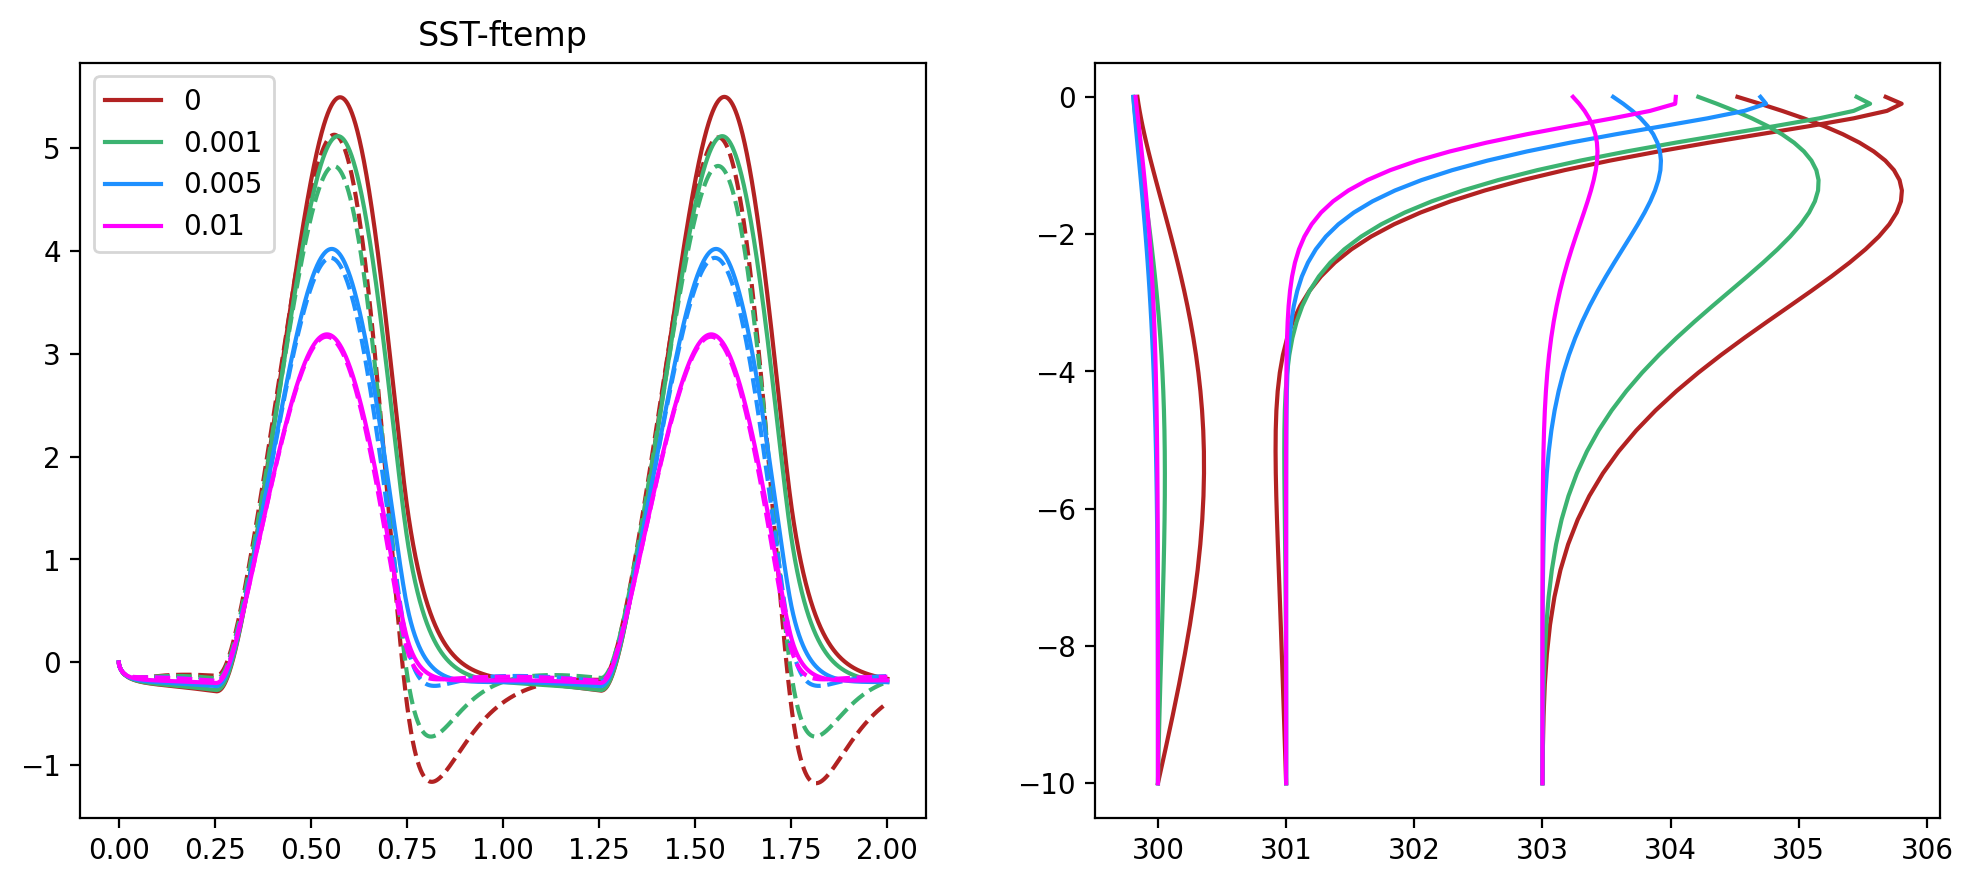

In [20]:
cols = ['firebrick','mediumseagreen','dodgerblue','magenta','orange','navy']
fig, ax = plt.subplots(1,2,dpi=200,figsize=(12,5))
for i in range(len(pmu)):
    ax[0].plot(simmu[i][2]/86400,simmu[i][0][:,0]-simmu[i][0][:,-1],label=pmu[i],c=cols[i])
    ax[0].plot(simmu[i][2]/86400,simmu[i][0][:,0]-simmu[i][0][:,20],'--',c=cols[i])
ax[0].legend()
ax[0].set(title='SST-ftemp')


for i in range(len(pmu)):
    noon = np.where(simmu[i][2]/86400 > 0.5)[0][0]
    pm6 = np.where(simmu[i][2]/86400 > 0.75)[0][0]
    night = np.where(simmu[i][2]/86400 > 1.)[0][0]
    ax[1].plot(simmu[i][0][noon,:]+1,simmu[i][1],c=cols[i])
    ax[1].plot(simmu[i][0][pm6,:]+3,simmu[i][1],c=cols[i])
    ax[1].plot(simmu[i][0][night,:],simmu[i][1],c=cols[i])

plt.show()

+++ Variable time-step interpolation +++
Interpolated dataset has 20153 time steps with average length 10.0 s.
Constant dt interpolation would require dt = 10.526 s --> 18189 steps.
Computation time will be reduced by -10.798 %
++++++++++++++++++++++++++++++++++++++++
Done, took  0.6448709964752197
+++ Variable time-step interpolation +++
Interpolated dataset has 20153 time steps with average length 10.0 s.
Constant dt interpolation would require dt = 10.526 s --> 18189 steps.
Computation time will be reduced by -10.798 %
++++++++++++++++++++++++++++++++++++++++
Done, took  0.7088768482208252
+++ Variable time-step interpolation +++
Interpolated dataset has 20153 time steps with average length 10.0 s.
Constant dt interpolation would require dt = 10.526 s --> 18189 steps.
Computation time will be reduced by -10.798 %
++++++++++++++++++++++++++++++++++++++++
Done, took  0.5710759162902832
+++ Variable time-step interpolation +++
Interpolated dataset has 20153 time steps with average leng

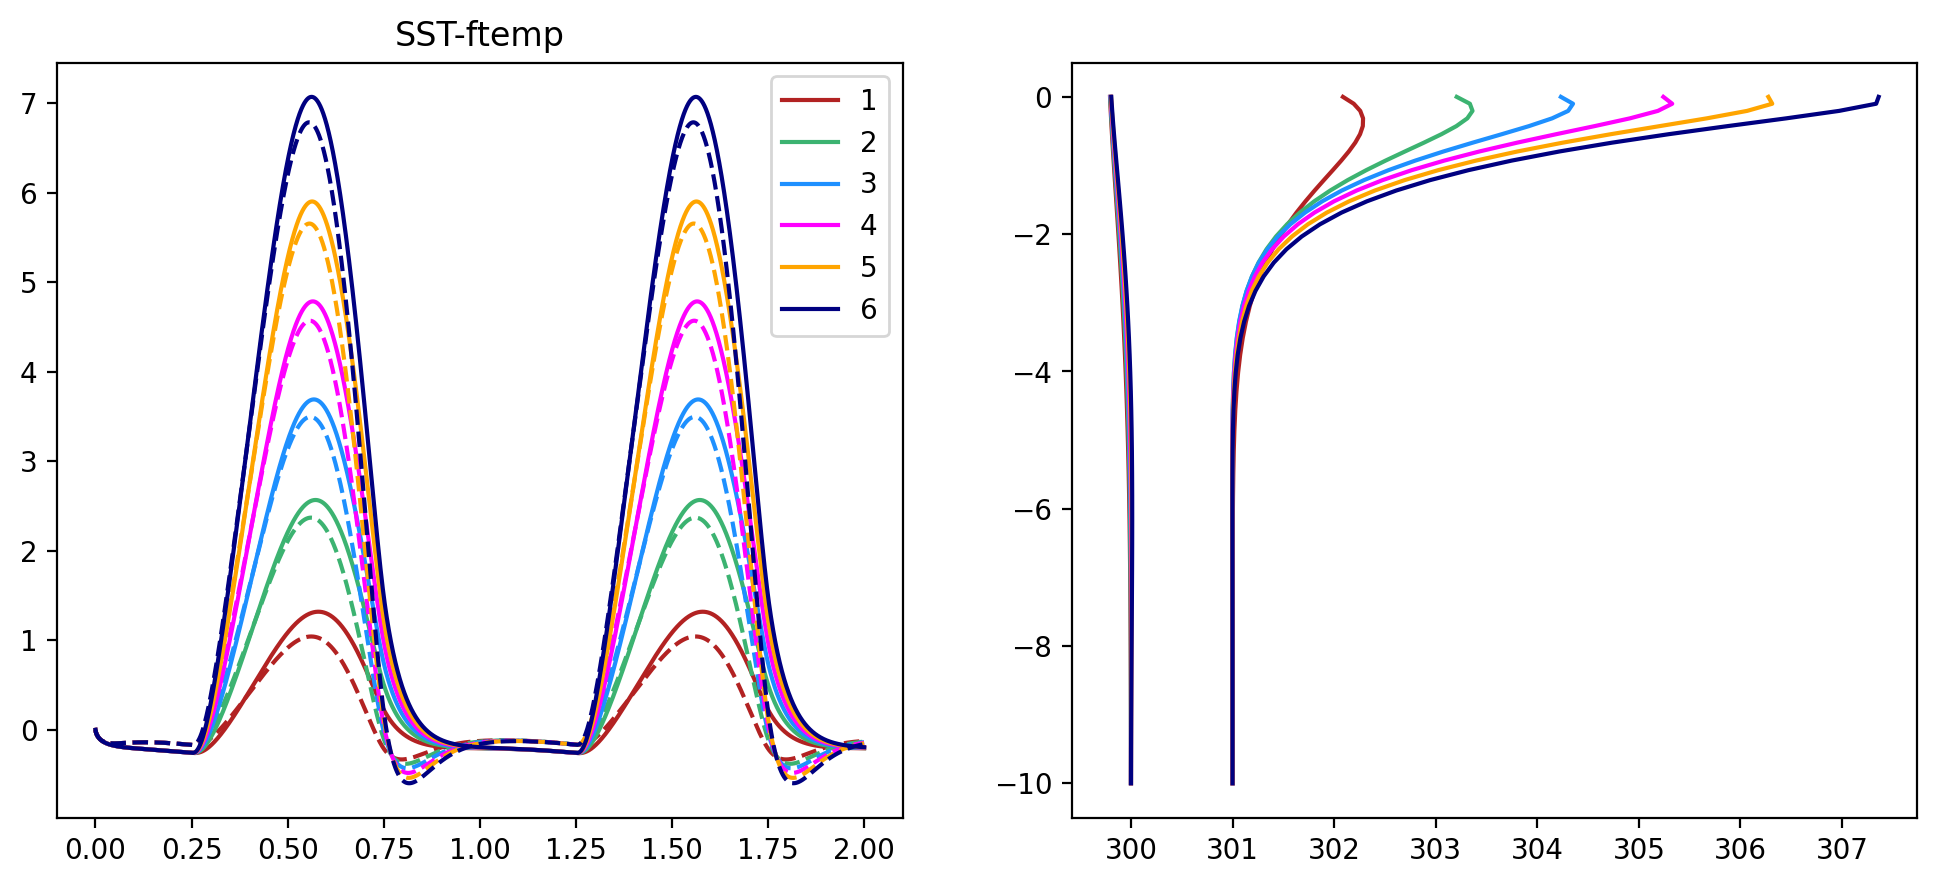

In [16]:
simattenu = []
parattenu = params.copy()
for i in range(len(pattenu)):
    parattenu[2] = pattenu[i]
    simattenu.append(simulate_eulerc(parattenu))
    
cols = ['firebrick','mediumseagreen','dodgerblue','magenta','orange','navy']
fig, ax = plt.subplots(1,2,dpi=200,figsize=(12,5))
for i in range(len(pattenu)):
    ax[0].plot(simattenu[i][2]/86400,simattenu[i][0][:,0]-simattenu[i][0][:,-1],label=pattenu[i],c=cols[i])
    ax[0].plot(simattenu[i][2]/86400,simattenu[i][0][:,0]-simattenu[i][0][:,20],'--',c=cols[i])
ax[0].legend()
ax[0].set(title='SST-ftemp')


for i in range(len(pattenu)):
    noon = np.where(simattenu[i][2]/86400 > 0.5)[0][0]
    night = np.where(simattenu[i][2]/86400 > 1.)[0][0]
    ax[1].plot(simattenu[i][0][noon,:]+1,simattenu[i][1],c=cols[i])
    ax[1].plot(simattenu[i][0][night,:],simattenu[i][1],c=cols[i])

plt.show()

+++ Variable time-step interpolation +++
Interpolated dataset has 23844 time steps with average length 8.519 s.
Constant dt interpolation would require dt = 5.555 s --> 34468 steps.
Computation time will be reduced by 30.823 %
++++++++++++++++++++++++++++++++++++++++
Done, took  0.7580461502075195
+++ Variable time-step interpolation +++
Interpolated dataset has 21842 time steps with average length 9.12 s.
Constant dt interpolation would require dt = 6.851 s --> 27949 steps.
Computation time will be reduced by 21.851 %
++++++++++++++++++++++++++++++++++++++++
Done, took  0.8192551136016846
+++ Variable time-step interpolation +++
Interpolated dataset has 20308 time steps with average length 9.772 s.
Constant dt interpolation would require dt = 8.942 s --> 21412 steps.
Computation time will be reduced by 5.156 %
++++++++++++++++++++++++++++++++++++++++
Done, took  0.5846695899963379
+++ Variable time-step interpolation +++
Interpolated dataset has 20153 time steps with average length 10

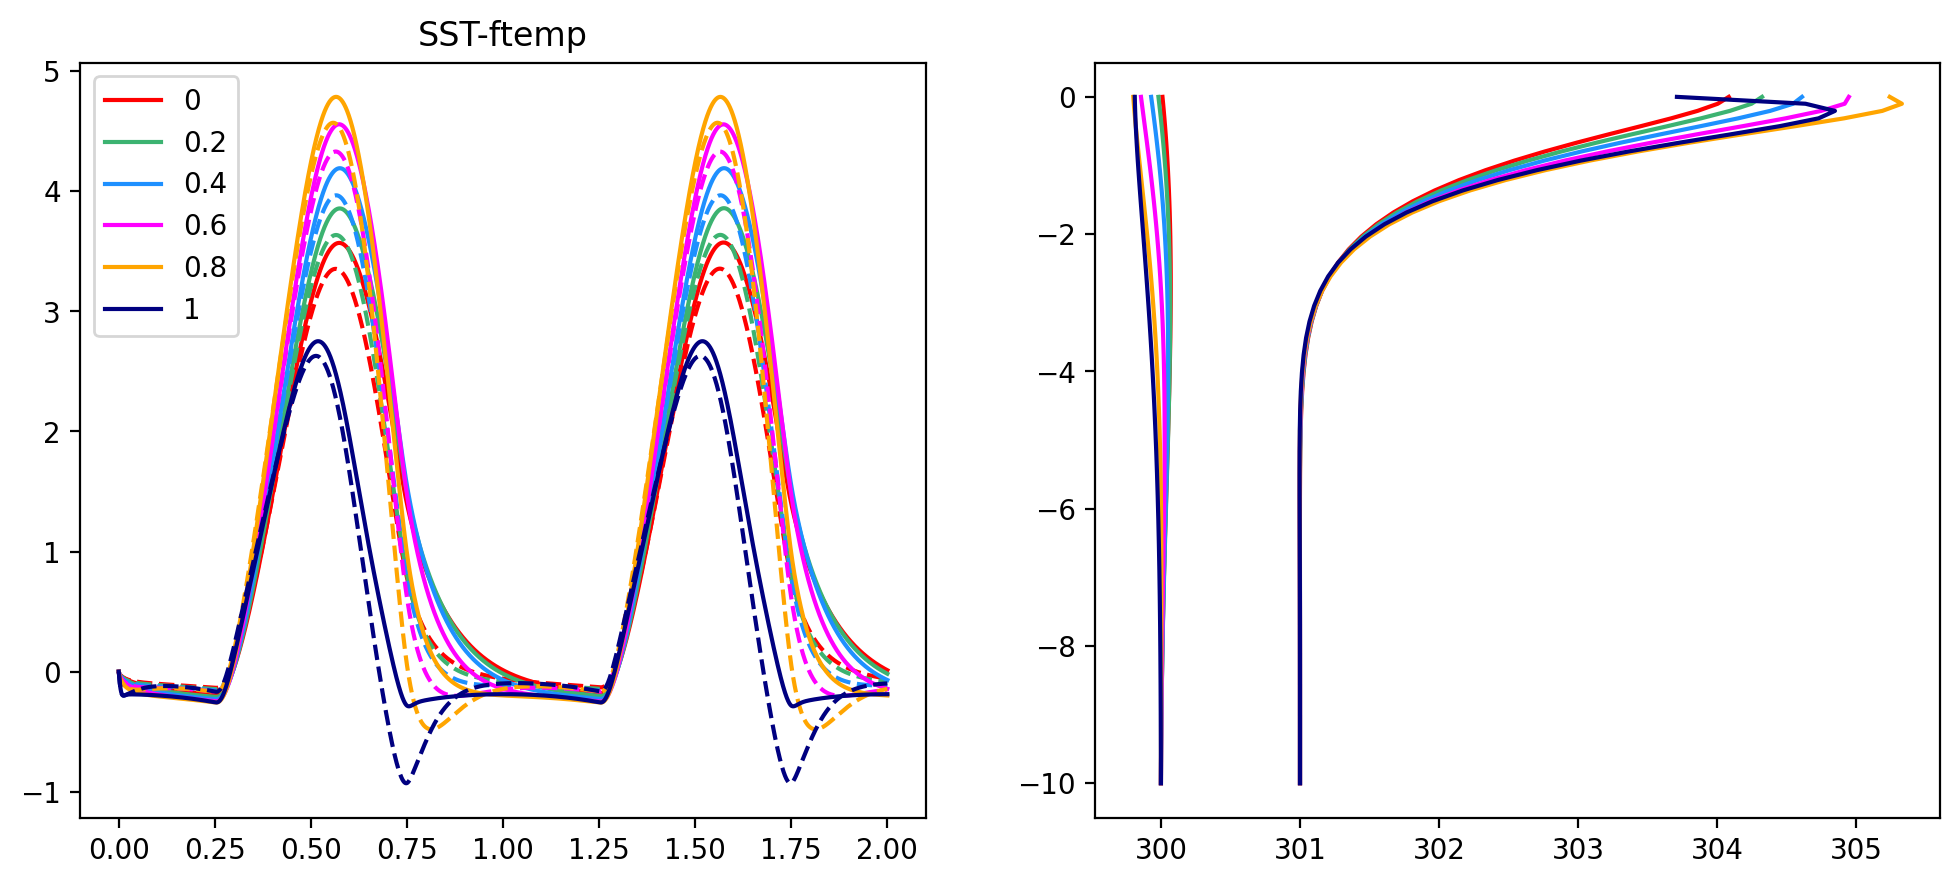

In [17]:
simk0 = []
park0 = params.copy()
for i in range(len(pk0)):
    park0[3] = pk0[i]
    simk0.append(simulate_eulerc(park0))
    
cols = ['red','mediumseagreen','dodgerblue','magenta','orange','navy']
fig, ax = plt.subplots(1,2,dpi=200,figsize=(12,5))
for i in range(len(pk0)):
    ax[0].plot(simk0[i][2]/86400,simk0[i][0][:,0]-simk0[i][0][:,-1],label=pk0[i],c=cols[i])
    ax[0].plot(simk0[i][2]/86400,simk0[i][0][:,0]-simk0[i][0][:,20],'--',c=cols[i])
ax[0].legend()
ax[0].set(title='SST-ftemp')


for i in range(len(pk0)):
    noon = np.where(simk0[i][2]/86400 > 0.5)[0][0]
    night = np.where(simk0[i][2]/86400 > 1.)[0][0]
    ax[1].plot(simk0[i][0][noon,:]+1,simk0[i][1],c=cols[i])
    ax[1].plot(simk0[i][0][night,:],simk0[i][1],c=cols[i])

plt.show()

+++ Variable time-step interpolation +++
Interpolated dataset has 20153 time steps with average length 10.0 s.
Constant dt interpolation would require dt = 10.526 s --> 18189 steps.
Computation time will be reduced by -10.798 %
++++++++++++++++++++++++++++++++++++++++
Done, took  0.7664718627929688
+++ Variable time-step interpolation +++
Interpolated dataset has 20153 time steps with average length 10.0 s.
Constant dt interpolation would require dt = 10.526 s --> 18189 steps.
Computation time will be reduced by -10.798 %
++++++++++++++++++++++++++++++++++++++++
Done, took  0.6431124210357666
+++ Variable time-step interpolation +++
Interpolated dataset has 20153 time steps with average length 10.0 s.
Constant dt interpolation would require dt = 10.526 s --> 18189 steps.
Computation time will be reduced by -10.798 %
++++++++++++++++++++++++++++++++++++++++
Done, took  0.6755166053771973
+++ Variable time-step interpolation +++
Interpolated dataset has 20153 time steps with average leng

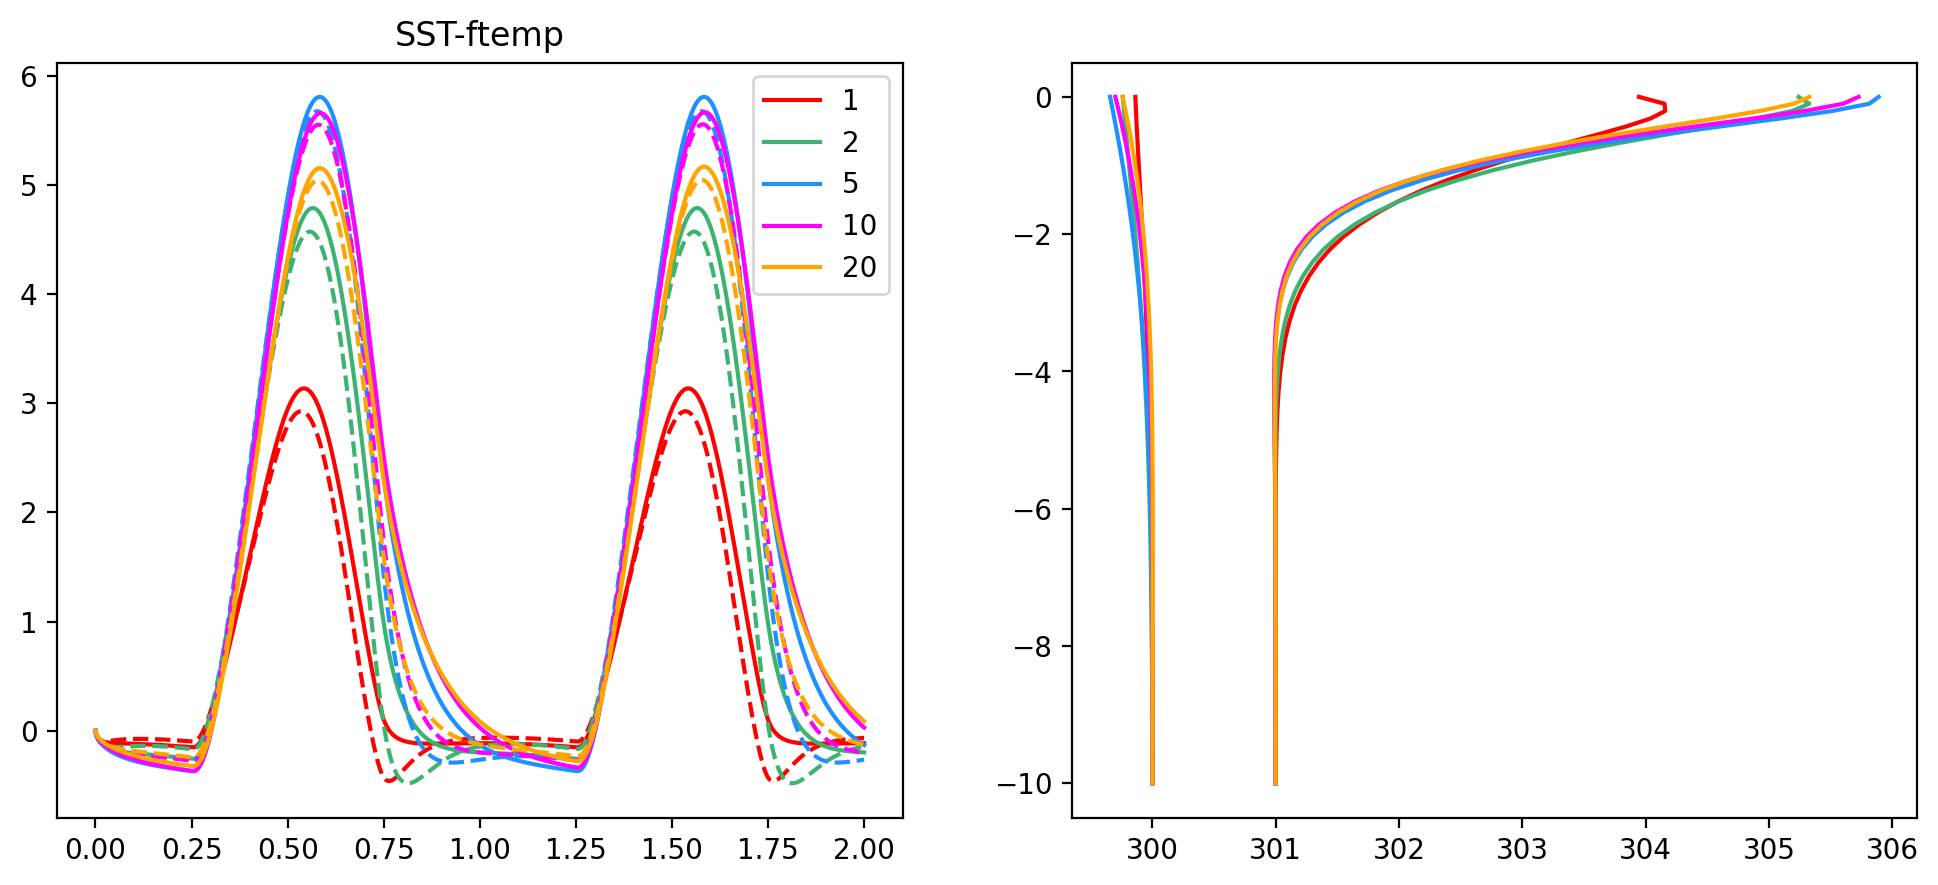

In [18]:
simgamma = []
pargamma = params.copy()
for i in range(len(pgamma)):
    pargamma[4] = pgamma[i]
    simgamma.append(simulate_eulerc(pargamma))
    
cols = ['red','mediumseagreen','dodgerblue','magenta','orange','navy']
fig, ax = plt.subplots(1,2,dpi=200,figsize=(12,5))
for i in range(len(pgamma)):
    ax[0].plot(simgamma[i][2]/86400,simgamma[i][0][:,0]-simgamma[i][0][:,-1],label=pgamma[i],c=cols[i])
    ax[0].plot(simgamma[i][2]/86400,simgamma[i][0][:,0]-simgamma[i][0][:,20],'--',c=cols[i])
ax[0].legend()
ax[0].set(title='SST-ftemp')


for i in range(len(pgamma)):
    noon = np.where(simgamma[i][2]/86400 > 0.5)[0][0]
    night = np.where(simgamma[i][2]/86400 > 1.2)[0][0]
    ax[1].plot(simgamma[i][0][noon,:]+1,simgamma[i][1],c=cols[i])
    ax[1].plot(simgamma[i][0][night,:],simgamma[i][1],c=cols[i])

plt.show()

In [75]:
simwind = []
parwind = np.arange(0,10,0.2)
params = [4e-5,0.006,2.2,0.8,3]
for i in range(len(parwind)):
    simwind.append(simulate_eulerc(params,windstrength=parwind[i]))

+++ Variable time-step interpolation +++
Interpolated dataset has 20153 time steps with average length 10.0 s.
Constant dt interpolation would require dt = 10.526 s --> 18189 steps.
Computation time will be reduced by -10.798 %
++++++++++++++++++++++++++++++++++++++++
Done, took  0.6376230716705322
+++ Variable time-step interpolation +++
Interpolated dataset has 20153 time steps with average length 10.0 s.
Constant dt interpolation would require dt = 10.526 s --> 18189 steps.
Computation time will be reduced by -10.798 %
++++++++++++++++++++++++++++++++++++++++
Done, took  0.636723518371582
+++ Variable time-step interpolation +++
Interpolated dataset has 20153 time steps with average length 10.0 s.
Constant dt interpolation would require dt = 10.526 s --> 18189 steps.
Computation time will be reduced by -10.798 %
++++++++++++++++++++++++++++++++++++++++
Done, took  0.6275770664215088
+++ Variable time-step interpolation +++
Interpolated dataset has 20153 time steps with average lengt

Done, took  0.6279153823852539
+++ Variable time-step interpolation +++
Interpolated dataset has 20566 time steps with average length 9.573 s.
Constant dt interpolation would require dt = 8.792 s --> 21776 steps.
Computation time will be reduced by 5.557 %
++++++++++++++++++++++++++++++++++++++++
Done, took  0.6526415348052979
+++ Variable time-step interpolation +++
Interpolated dataset has 20882 time steps with average length 9.374 s.
Constant dt interpolation would require dt = 8.347 s --> 22937 steps.
Computation time will be reduced by 8.959 %
++++++++++++++++++++++++++++++++++++++++
Done, took  0.6375157833099365
+++ Variable time-step interpolation +++
Interpolated dataset has 21114 time steps with average length 9.154 s.
Constant dt interpolation would require dt = 7.935 s --> 24129 steps.
Computation time will be reduced by 12.495 %
++++++++++++++++++++++++++++++++++++++++
Done, took  0.6663448810577393
+++ Variable time-step interpolation +++
Interpolated dataset has 21875 ti

IndexError: list index out of range

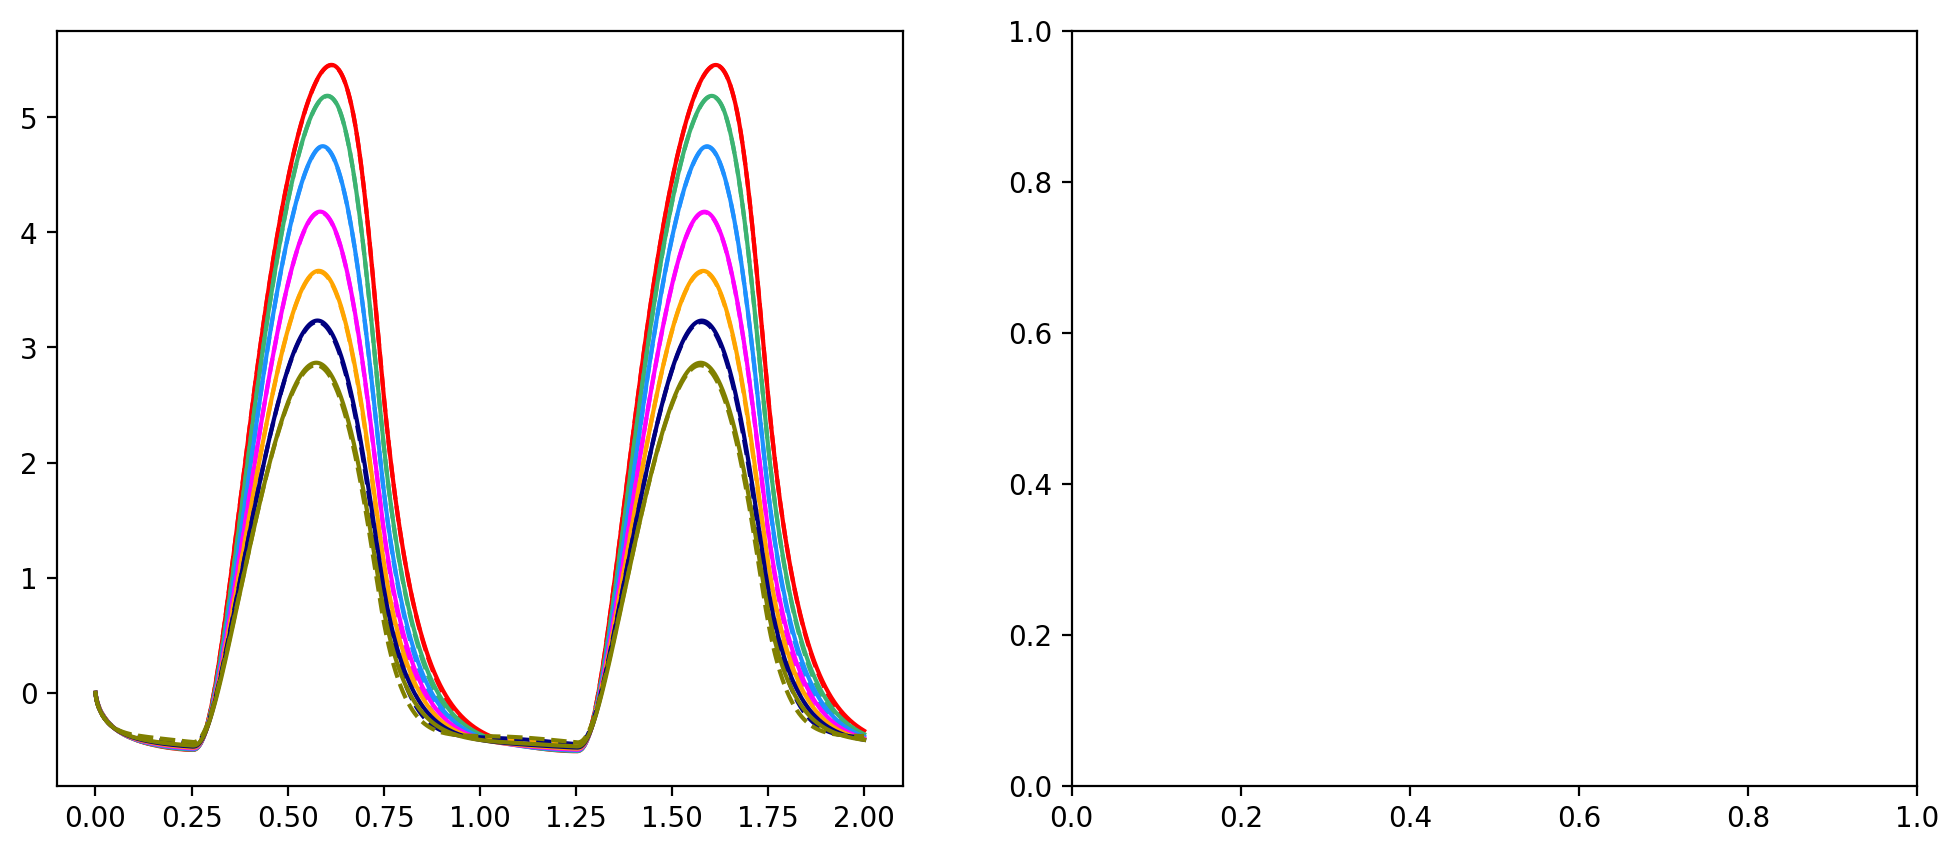

In [76]:
cols = ['red','mediumseagreen','dodgerblue','magenta','orange','navy','olive']
fig, ax = plt.subplots(1,2,dpi=200,figsize=(12,5))
for i in range(len(parwind)):
    ax[0].plot(simwind[i][2]/86400,simwind[i][0][:,0]-simwind[i][0][:,-1],label=parwind[i],c=cols[i])
    ax[0].plot(simwind[i][2]/86400,simwind[i][0][:,0]-simwind[i][0][:,20],'--',c=cols[i])
ax[0].legend()
ax[0].set(title='SST-ftemp')


for i in range(len(parwind)):
    noon = np.where(simwind[i][2]/86400 > 0.5)[0][0]
    pm6 = np.where(simwind[i][2]/86400 > 0.625)[0][0]
    night = np.where(simwind[i][2]/86400 > 1.)[0][0]
    ax[1].plot(simwind[i][0][noon,:]+1,simwind[i][1],c=cols[i])
    ax[1].plot(simwind[i][0][pm6,:]+3,simwind[i][1],c=cols[i],alpha=0.2)
    ax[1].plot(simwind[i][0][night,:],simwind[i][1],c=cols[i])

plt.show()

## Functional form of wind-dependence of amplitude

In [39]:
ampmax = []
ampmin = []
for i in range(len(parwind)):
    ampmax.append(np.amax(simwind[i][0][:,0])-simwind[i][0][0,0])
    ampmin.append(np.amin(simwind[i][0][:,0])-simwind[i][0][0,0])

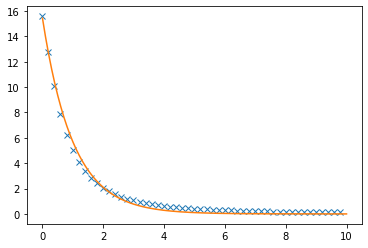

In [40]:
amps = np.array(ampmax) - np.array(ampmin)

xxx = np.linspace(0.01,10,200)
plt.plot(parwind,amps,'x')
plt.plot(xxx,amps[0]*np.exp(-xxx))

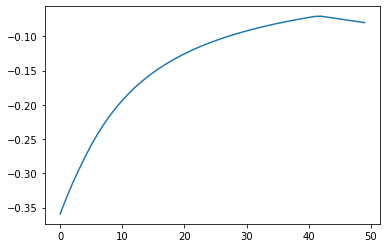

In [42]:
plt.plot(ampmin)

In [52]:
def ff(x,mu,std):
    return np.exp(-(x-mu)**2/(2*std**2))

20

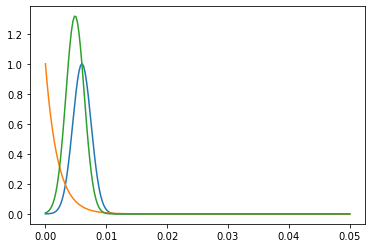

In [74]:
xvals = np.linspace(0,0.05,200)
plt.plot(xvals,ff(xvals,0.006,0.0015))
plt.plot(xvals,np.exp(-xvals*500))
plt.plot(xvals,np.exp(-xvals*500)*ff(xvals,0.006,0.0015)*20)
np.argmax(np.exp(-xvals*1000)*ff(xvals,0.006,0.001)*100)

In [71]:
xvals[20]

0.0050251256281407045

In [ ]:
np.exp(-xvals*1000)*ff(xvals,0.006,0.001)*100